In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

h = sp.constants.Planck
kb = sp.constants.Boltzmann
K0 = sp.constants.zero_Celsius
R = sp.constants.R

T = np.linspace(-30,1000,61)
T = T + K0



data from 
"Substituent Effects on the Oxidation of Cinnamic Acid by Methyltributylammonium Permanganate in Methylene Chloride"
Joaquin F. Perez-Benito
*Chemica Scripta*, **1987**, *27*, 433--436
Obtained through interlibrary loan. No DOI.



In [69]:
# Units dH, kJ/mole; dS, J/Mole/K
data = [["H",      33.6, 1.1, -118, 4],
        ["a-D",    33.4, 0.6, -119, 2],
        ["b-D",    33.1, 1.3, -120, 5],
        ["a-CH3",  37.2, 0.7, -116, 3],
        ["a-Ph",   42.8, 1.4, -105, 5],
        ["o-OCH3", 37.3, 0.9, -113, 4],
        ["m-OCH3", 33.1, 1.9, -119, 7],
        ["p-OCH3", 37.8, 2.2, -107, 8],
        ["m-Cl",   30.2, 1.2, -123, 5],
        ["m-Br",   30.6, 2.1, -122, 8],
        ["m-N02",  26.3, 1.9, -129, 7],
        ["m-CF3",  29.3, 3.6, -124, 14],
        ["p-CH3",  35.4, 1.4, -115, 5]]

data = [["H",      33.6, 1.1, -118, 4],
        ["a-CH3",  37.2, 0.7, -116, 3],
        ["a-Ph",   42.8, 1.4, -105, 5],
        ["o-OCH3", 37.3, 0.9, -113, 4],
        ["m-OCH3", 33.1, 1.9, -119, 7],
        ["p-OCH3", 37.8, 2.2, -107, 8],
        ["m-Cl",   30.2, 1.2, -123, 5],
        ["m-Br",   30.6, 2.1, -122, 8],
        ["m-N02",  26.3, 1.9, -129, 7],
        ["m-CF3",  29.3, 3.6, -124, 14],
        ["p-CH3",  35.4, 1.4, -115, 5]]


columns = ["Substituent", "dH", "dH_err", "dS", "dS_err"]

df = pd.DataFrame(data, columns=columns)


Index: 0, Substituent: H, dH: 33.6, dS: -118
Index: 1, Substituent: a-CH3, dH: 37.2, dS: -116
Index: 2, Substituent: a-Ph, dH: 42.8, dS: -105
Index: 3, Substituent: o-OCH3, dH: 37.3, dS: -113
Index: 4, Substituent: m-OCH3, dH: 33.1, dS: -119
Index: 5, Substituent: p-OCH3, dH: 37.8, dS: -107
Index: 6, Substituent: m-Cl, dH: 30.2, dS: -123
Index: 7, Substituent: m-Br, dH: 30.6, dS: -122
Index: 8, Substituent: m-N02, dH: 26.3, dS: -129
Index: 9, Substituent: m-CF3, dH: 29.3, dS: -124
Index: 10, Substituent: p-CH3, dH: 35.4, dS: -115


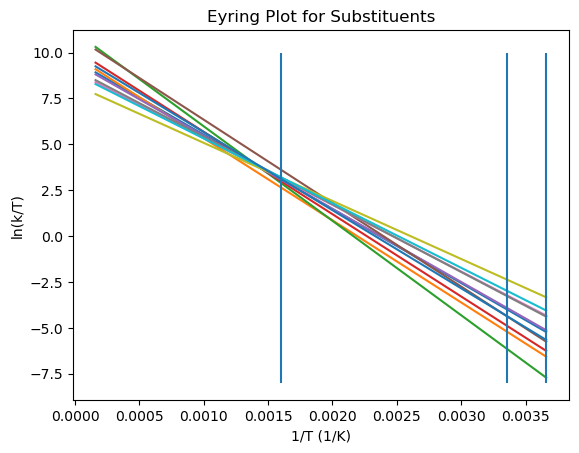

In [58]:


for index, row in df.iterrows():
    print(f"Index: {index}, Substituent: {row['Substituent']}, dH: {row['dH']}, dS: {row['dS']}")
    dH = row['dH'] * 1000  # Convert kJ to J
    dS = row['dS']  # J/K
    k = kb * T / h * np.exp(-dH / (R*T))* np.exp(dS / R)
    plt.plot(1/T, np.log(k/T), label=row['Substituent'])
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(k/T)')
#plt.xlim(0.0012,0.0017)
#plt.ylim(2.5,6)
plt.title('Eyring Plot for Substituents')
#plt.legend()
#plt.grid()
plt.vlines(1/273, -8,10)
plt.vlines(1/298, -8,10)
plt.vlines(1/626, -8,10)

plt.show()


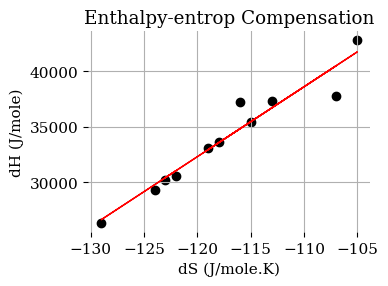

631.4370215727208

In [95]:
dH = df['dH'] * 1000  # Convert kJ to J
dS = df['dS']  # J/K
plt.scatter(dS, dH, label=row['Substituent'])

slope, intercept, rvalue, stderr, intstderr = sp.stats.linregress(dS, dH)
y_calc = slope * dS + intercept
plt.plot(dS, y_calc, color='red', label='Linear Fit')
plt.xlabel('dS (J/mole.K)')
plt.ylabel('dH (J/mole)')
#plt.xlim(0.0012,0.0017)
#plt.ylim(2.5,6)
plt.title('Enthalpy-entrop Compensation')
#plt.legend()
plt.grid()
plt.show()
slope

Index: 0, Substituent: H, dH: 33.6, dS: -118
Index: 1, Substituent: a-CH3, dH: 37.2, dS: -116
Index: 2, Substituent: a-Ph, dH: 42.8, dS: -105
Index: 3, Substituent: o-OCH3, dH: 37.3, dS: -113
Index: 4, Substituent: m-OCH3, dH: 33.1, dS: -119
Index: 5, Substituent: p-OCH3, dH: 37.8, dS: -107
Index: 6, Substituent: m-Cl, dH: 30.2, dS: -123
Index: 7, Substituent: m-Br, dH: 30.6, dS: -122
Index: 8, Substituent: m-N02, dH: 26.3, dS: -129
Index: 9, Substituent: m-CF3, dH: 29.3, dS: -124
Index: 10, Substituent: p-CH3, dH: 35.4, dS: -115


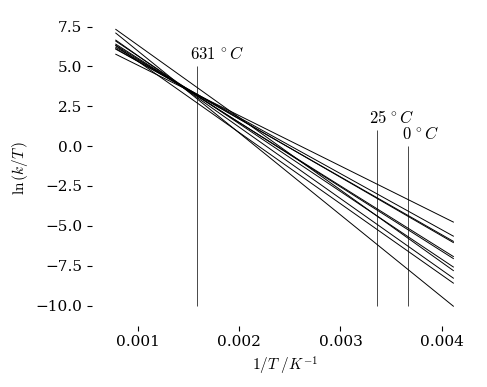

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"


data = [["H",      33.6, 1.1, -118, 4],
        ["a-CH3",  37.2, 0.7, -116, 3],
        ["a-Ph",   42.8, 1.4, -105, 5],
        ["o-OCH3", 37.3, 0.9, -113, 4],
        ["m-OCH3", 33.1, 1.9, -119, 7],
        ["p-OCH3", 37.8, 2.2, -107, 8],
        ["m-Cl",   30.2, 1.2, -123, 5],
        ["m-Br",   30.6, 2.1, -122, 8],
        ["m-N02",  26.3, 1.9, -129, 7],
        ["m-CF3",  29.3, 3.6, -124, 14],
        ["p-CH3",  35.4, 1.4, -115, 5]]


columns = ["Substituent", "dH", "dH_err", "dS", "dS_err"]

df = pd.DataFrame(data, columns=columns)

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


for index, row in df.iterrows():
    print(f"Index: {index}, Substituent: {row['Substituent']}, dH: {row['dH']}, dS: {row['dS']}")
    dH = row['dH'] * 1000  # Convert kJ to J
    dS = row['dS']  # J/K
    k = kb * T / h * np.exp(-dH / (R*T))* np.exp(dS / R)
    ax.plot(1/T, np.log(k/T), color='black', zorder=1, linewidth=0.7, label=row['Substituent'])
ax.set_xlabel(r'$1/T\ /K^{-1}$')
ax.set_xticks([0, 0.001, 0.002, 0.0030, 0.004])

ax.set_ylabel(r'$\ln{(k/T\,)}$')
#plt.xlim(0.0012,0.0017)
#plt.ylim(2.5,6)
#ax.set_title('Eyring Plot for Substituents')
#plt.legend()
#plt.grid()
ax.vlines(1/273, -10,0, linewidth=0.5)
ax.vlines(1/298, -10,1, linewidth=0.5)
ax.vlines(1/631, -10,5, linewidth=0.5)

ax.text(1/273+1.3e-4, 0.2, r'$0\, ^\circ C$', fontsize=12, ha='center', va='bottom')
ax.text(1/298+1.5e-4, 1.2, r'$25\, ^\circ C$', fontsize=12, ha='center', va='bottom')
ax.text(1/631+2e-4, 5.2, r'$631\, ^\circ C$', fontsize=12, ha='center', va='bottom')
plt.savefig('Eyring_Plot.pdf', bbox_inches='tight')
plt.show()


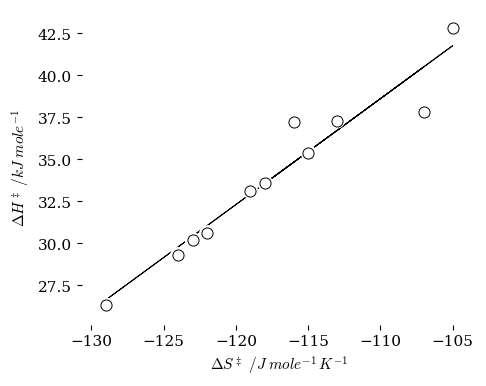

(631.4370215727208, 56.40032688182803)

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_17/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

dH = df['dH'] * 1000  # Convert kJ to J
dS = df['dS']  # J/K


result = sp.stats.linregress(dS, dH)
slope = result.slope
intercept = result.intercept
stderr = result.stderr
intstderr = result.intercept_stderr

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area  



ax.scatter(dS, dH/1000,  s=128, color="white",  edgecolors = "none", zorder=2)
ax.scatter(dS, dH/1000,  s=64, color="white",  edgecolors = "black", linewidths=0.7, zorder=2)
#ax.scatter(dS, dH,  s=32, color="white",  edgecolors = "none", alpha = 1, zorder=2)


y_calc = slope * dS + intercept
ax.plot(dS, y_calc/1000, color='black', zorder=1, linewidth=0.7, label='Linear Fit')
ax.set_xlabel(r'$\Delta S^\ddagger\ /J\; mole^{-1}\, K^{-1}$')
ax.set_ylabel(r'$\Delta H^\ddagger\ /kJ\; mole^{-1}$')
plt.savefig('dHdS_Plot.pdf', bbox_inches='tight')

plt.show()
slope, stderr
